# Evaluation master 2 ECAP

Pour cette évaluation vous allez analyser un jeu de données qui en ligne contient des téléphones et en colonnes ses caractéristiques.

Votre objectif sera de voir s'il est possible de prédire la catégorie de prix d'un téléphone en fonction de ses caractéristiques.

Les catégories de prix se décompose en 4 :

- 0 = Bon marché
- 1 = Moyenne gamme
- 2 = Haute de gamme
- 3 = Très haut de gamme

Vous aurez 20 features pour prédire ces catégories.



### Dictionnaire de données

| Attribut        | Description                                                          |
|-----------------|----------------------------------------------------------------------|
| battery_power   | Énergie totale qu'une batterie peut stocker à un moment donné, mesurée en mAh |
| blue            | Présence ou absence de la fonction Bluetooth                          |
| clock_speed     | Vitesse à laquelle le microprocesseur exécute les instructions       |
| dual_sim        | Prise en charge de la double carte SIM ou non                         |
| fc              | Méga pixels de la caméra frontale                                     |
| four_g          | Présence ou absence de la technologie 4G                              |
| int_memory      | Mémoire interne en gigaoctets                                        |
| m_dep           | Profondeur du téléphone mobile en cm                                  |
| mobile_wt       | Poids du téléphone mobile                                            |
| n_cores         | Nombre de cœurs du processeur                                        |
| pc              | Méga pixels de la caméra principale                                   |
| px_height       | Hauteur de résolution en pixels                                      |
| px_width        | Largeur de résolution en pixels                                       |
| ram             | Mémoire vive (RAM) en mégaoctets                                      |
| sc_h            | Hauteur de l'écran du mobile en cm                                   |
| sc_w            | Largeur de l'écran du mobile en cm                                    |
| talk_time       | Temps le plus long qu'une seule charge de batterie durera lorsqu'elle est utilisée |
| three_g         | Présence ou absence de la technologie 3G                              |
| touch_screen    | Présence ou absence de l'écran tactile                                |
| wifi            | Présence ou absence de la fonction Wi-Fi                              |
| price_range     | Variable cible avec les valeurs 0 (Bon marché), 1 (Moyenne gamme), 2 (Haute de gamme) et 3 (Très haut de gamme) |


<div style="background-color: #008000; padding: 10px; border: 1px solid #000000;">
    Question(1) : 

    Quel type de modélisation pouvez-vous faire avec ce type de données? Sachant que price_range est la variable cible.
</div>


**REPONDRE ICI**

####  Import package

In [118]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV

from sklearn.svm import SVC

In [19]:
#Load data
df = pd.read_csv("./data/mobile_price_na.csv", sep=";")

In [41]:
# Afficher le nombre de lignes et de colonnes
nb_lignes, nb_colonnes = df.shape
print(f"Nombre de lignes : {nb_lignes}")
print(f"Nombre de colonnes : {nb_colonnes}")

# Afficher le nombre de valeurs manquantes par colonne
valeurs_manquantes = df.isnull().sum()
print("\nNombre de valeurs manquantes par colonne :")
print(valeurs_manquantes)

# Afficher le nombre de valeurs manquantes par ligne
valeurs_manquantes = df.drop('price_range', axis=1)\
                            .isnull()\
                                .all(axis=1)\
                                    .sum()
print("\nNombre de lignes avec uniquement des valeurs manquantes :")
print(valeurs_manquantes)


Nombre de lignes : 2000
Nombre de colonnes : 21

Nombre de valeurs manquantes par colonne :
battery_power    10
blue             10
clock_speed      11
dual_sim         14
fc               12
four_g           11
int_memory       27
m_dep            28
mobile_wt        29
n_cores          11
pc               14
px_height        13
px_width         15
ram              25
sc_h             23
sc_w             17
talk_time        16
three_g          17
touch_screen     22
wifi              5
price_range       0
dtype: int64

Nombre de lignes avec uniquement des valeurs manquantes :
5


<div style="background-color: #008000; padding: 10px; border: 1px solid #000000;">
    Question(2) : 

    Que devez-vous faire dans cette situation?
    Quelle stratégie d'imputation choisissez-vous?
</div>


**REPONDRE ICI**

Supposons que votre stratégie a marché. Nous utilisons un dataset sans valeur manquante maintenant

In [44]:
df_clean = pd.read_csv('./data/mobile_price.csv', sep=',')

Text(0.5, 1.0, 'Correlation ')

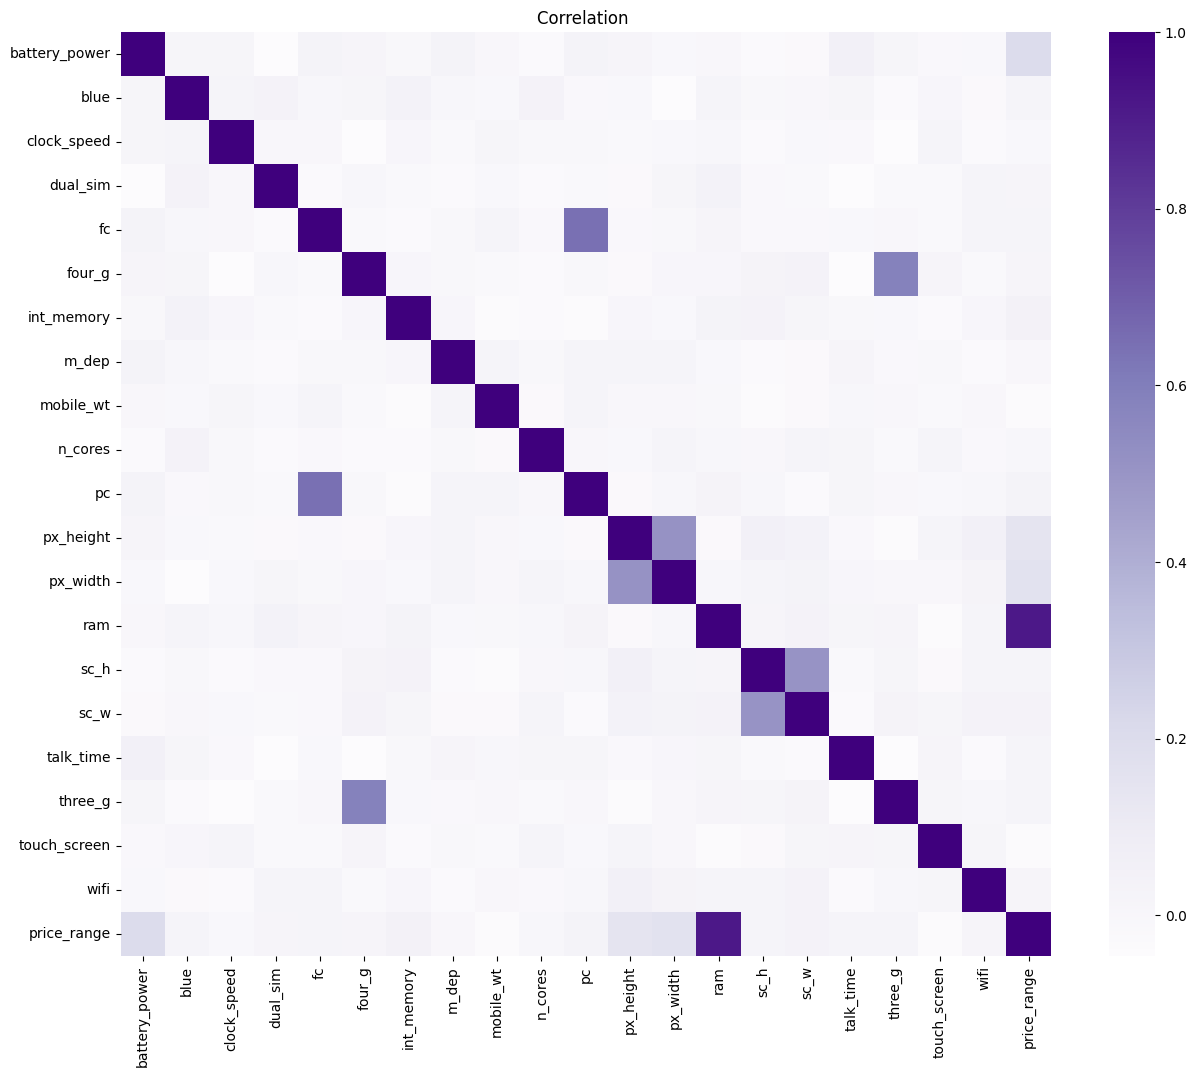

In [126]:
#Calcul des corrélations
corr=df_clean.corr('pearson')
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

In [49]:
#Price range correlation
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

<div style="background-color: #008000; padding: 10px; border: 1px solid #000000;">
    Question(3) : 

    Commentez la matrice de corrélation.
    La méthode de corrélation choisie est-elle pertinente?
    Si non, quelle approche alternative pour étudier le lien entre la target et les features?
</div>


**REPONDRE ICI**

## Analyse statistiques

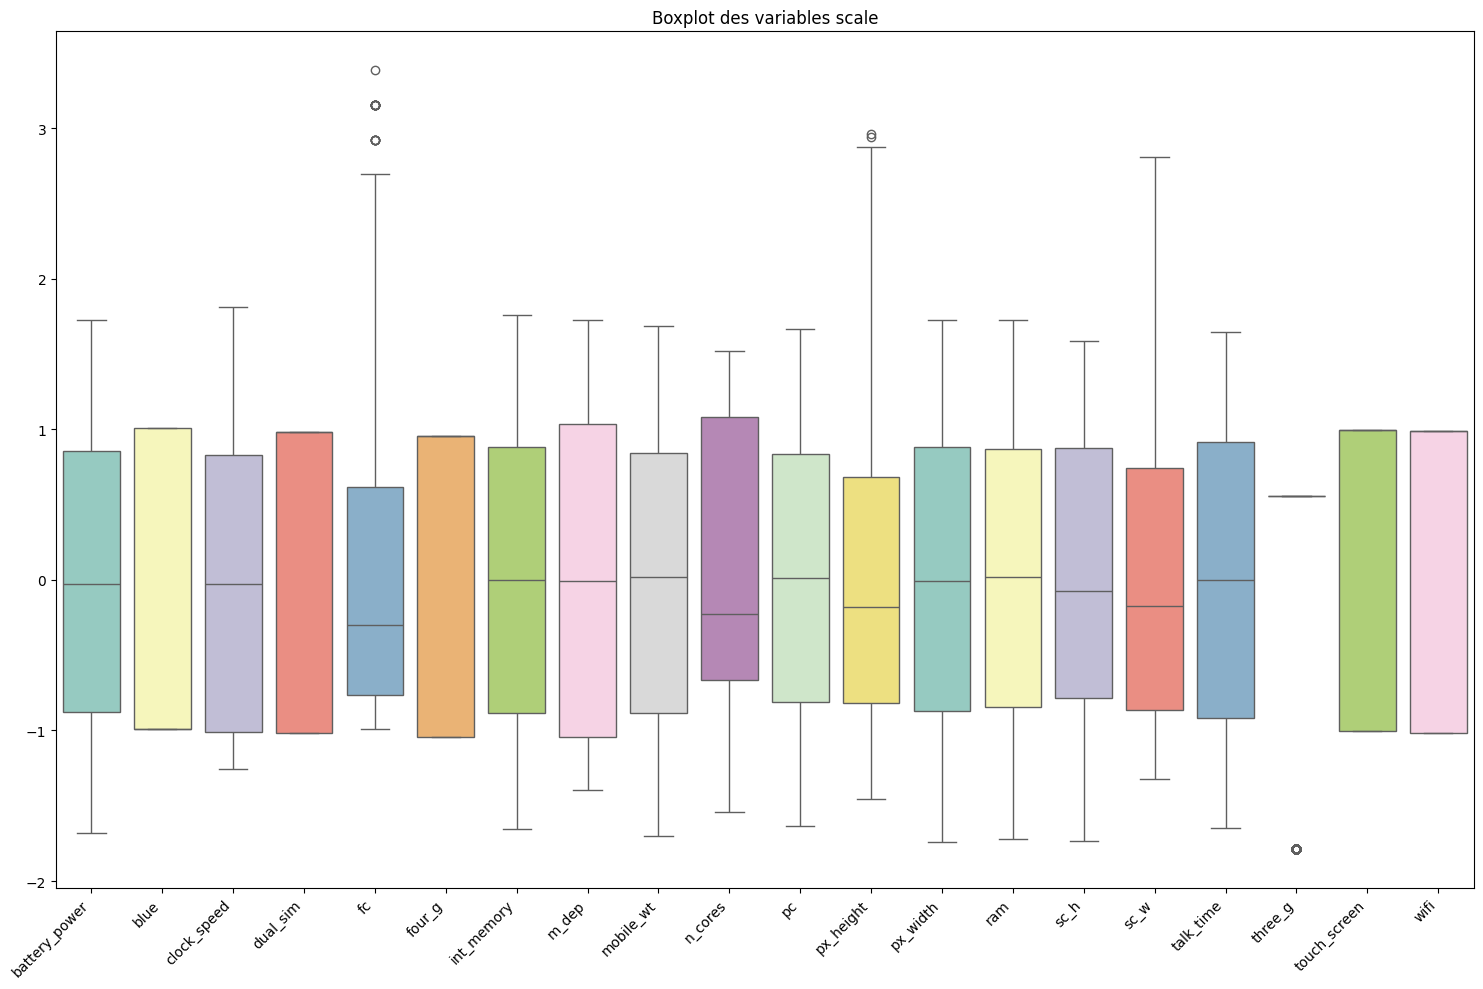

In [93]:
# on retire la target
features = df_clean.drop('price_range',axis=1).columns


# Appliquer la standardization (z-score)
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df_clean[features]), columns=features)


# Créer un boxplot pour toutes les variables numériques sur une même grille
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_scaled, palette='Set3')
plt.title('Boxplot des variables scale')

# Ajuster la mise en page
plt.xticks(rotation=45, ha='right')  # Ajuster l'angle des étiquettes si nécessaire
plt.tight_layout()

# Afficher le graphique
plt.show()


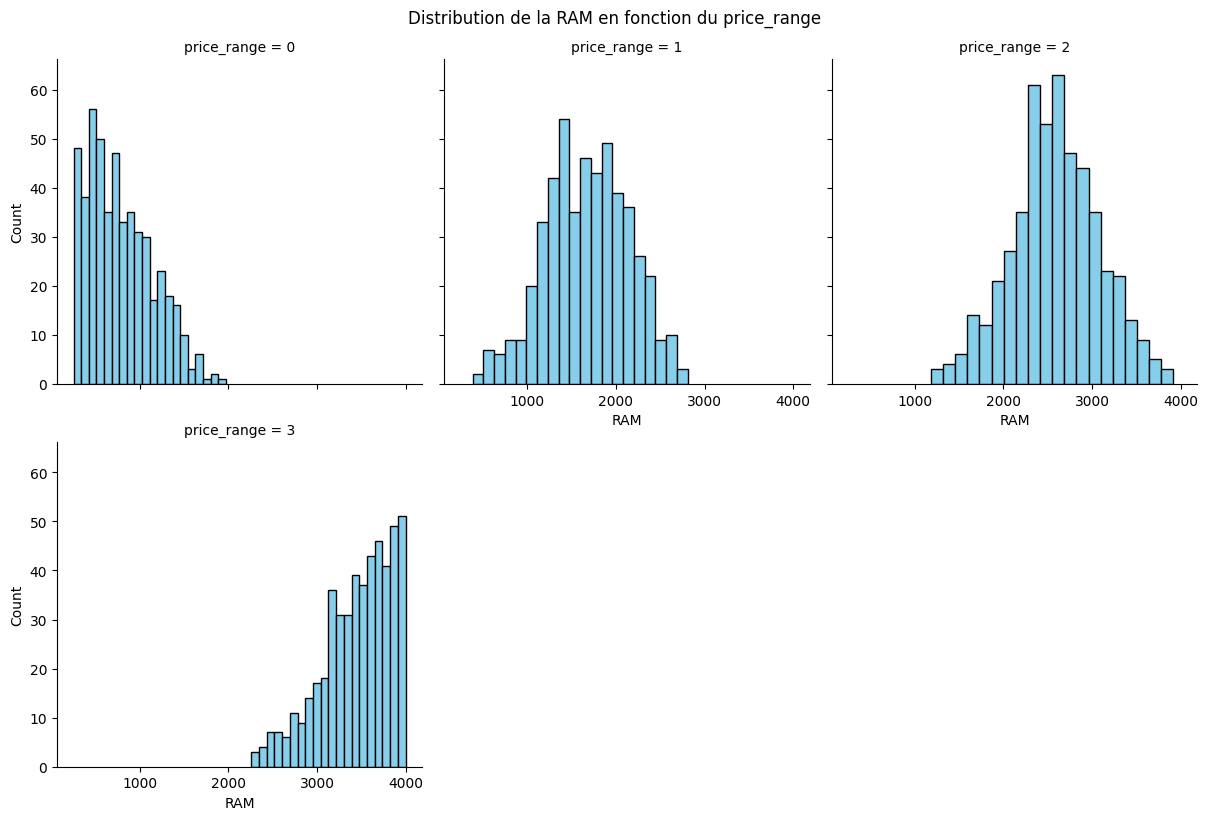

In [81]:
# Tracer un histogramme avec facettes
g = sns.FacetGrid(df_clean, col="price_range", height=4, col_wrap=3)
g.map(plt.hist, 'ram', bins=20, color='skyblue', edgecolor='black')

# Ajouter des titres
g.set_axis_labels("RAM", "Count")
plt.suptitle("Distribution de la RAM en fonction du price_range", y=1.02)

# Afficher le graphique
plt.show()


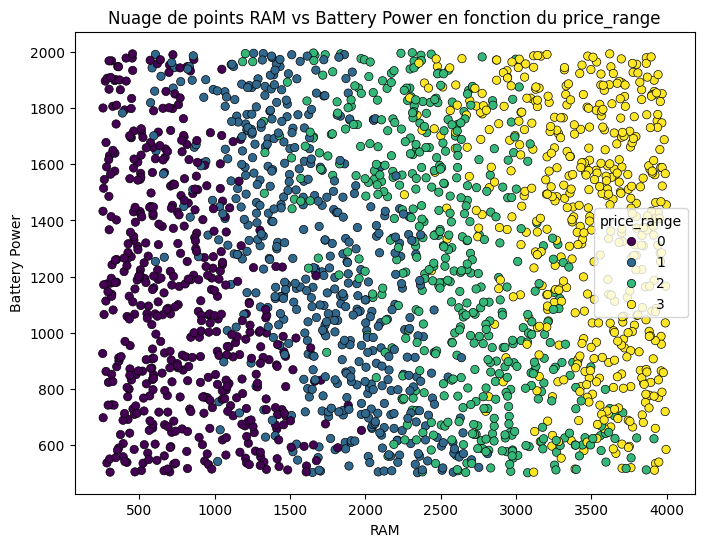

In [127]:
#Nuage de points
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(data=df_clean, x='ram', y='battery_power', hue='price_range', palette='viridis', edgecolor='black')

plt.gcf()

# Ajouter des titres
plt.xlabel("RAM")
plt.ylabel("Battery Power")
plt.title("Nuage de points RAM vs Battery Power en fonction du price_range")

# Afficher le graphique
plt.show()

<div style="background-color: #008000; padding: 10px; border: 1px solid #000000;">
    Question(4) : 

    Comment interpréter le boxplot des variables?

    A partir de l'analyse graphique des 2 variables plus corréllées avec la target, que peut-on déduire?
    Quel semble l'effet de chaque variable sur la target?
   
</div>


**REPONDRE ICI**

### Modélisation

Nous souhaitons maintenant réaliser un svm classifier avec price_range en cible de la modélisation.<br>
Ici, nous utiliserons uniquement le svm comme modèle à entrainer.


<div style="background-color: #008000; padding: 10px; border: 1px solid #000000;">
    Question(5) : 

    Le SVM ne permet pas nativement de réaliser des classifications avec plus de 2 modalités à prédire.
    Quel(s) changement(s) faut-il réaliser pour pouvoir le faire, nommer le(s)?
    
</div>


**REPONDRE ICI**

In [103]:
#Scaling features 

X = df_clean.drop('price_range', axis=1)
y = df_clean['price_range']

sc = StandardScaler()

X_sc = sc.fit_transform(X)

In [104]:
#Test et train
X_train , X_test, y_train, y_test = train_test_split(X_sc,y ,shuffle=True, random_state=42, test_size=0.2)

In [106]:
#Modele svm classifieur 
svm=SVC(random_state=1)
svm.fit(X_train,y_train)

print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.9825
test accuracy: 0.8925


<div style="background-color: #008000; padding: 10px; border: 1px solid #000000;">
    Question(6) : 

Comment interpréter ce résultat?
    
</div>


**REPONDRE ICI**

## Grid Search pour améliorer le modèle

In [119]:
# Définir les paramètres que vous souhaitez optimiser
param_grid = {'C': [0.1, 1, 10, 100],
               'kernel': ['linear', 'rbf'],
                 'decision_function_shape': ['ovo', 'ovr']
                 }

# Créer un classificateur SVM
svm = SVC()

# Créer un objet GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5)  

# Effectuer la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et la précision associée
print("Meilleurs paramètres:", grid_search.best_params_)
print("Précision sur l'ensemble de validation croisée:", grid_search.best_score_)

# Évaluer le modèle final sur l'ensemble de test
test_accuracy = grid_search.score(X_test, y_test)
print("Précision sur l'ensemble de test:", test_accuracy)

Meilleurs paramètres: {'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'linear'}
Précision sur l'ensemble de validation croisée: 0.9625
Précision sur l'ensemble de test: 0.975


In [125]:
from sklearn.metrics import confusion_matrix

# Utiliser le meilleur modèle trouvé par la recherche par grille
best_model = grid_search.best_estimator_

# Faire des prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher matrice de confusion

print(conf_matrix)


[[ 99   6   0   0]
 [  0  91   0   0]
 [  0   1  89   2]
 [  0   0   1 111]]


<div style="background-color: #008000; padding: 10px; border: 1px solid #000000;">
    Question(7) : 

Quels éléments n'ont pas été vérifiés durant la modélisation?

Quels éléments sont mauvais ou doivent être modifiliés?
    
</div>


**REPONDRE ICI**

<div style="background-color: #008000; padding: 10px; border: 1px solid #000000;">
    Question(8) : 

Si vous deviez refaire ce code que changeriez-vous?

Merci d'indiquer les étapes que vous auriez réalisées.
    
</div>


**REPONDRE ICI**